In [1]:
# entries
import pandas as pd
import numpy as np

data = pd.read_csv('db/test.csv')
data.replace('?', np.nan, inplace= True)

data = data.astype({"age": np.float64, "fare": np.float64})
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)


,survived
pclass,0.312469
survived,1.000000
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


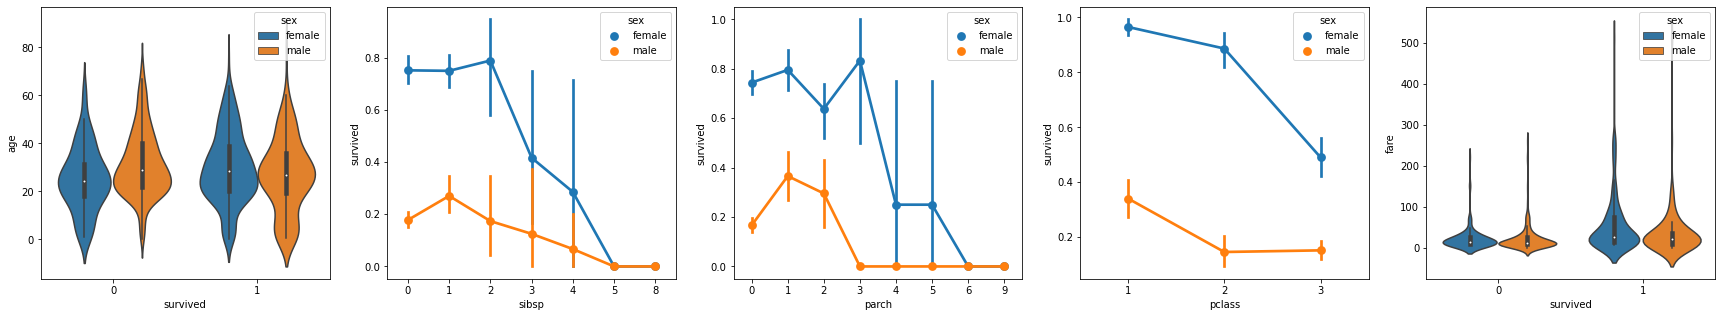

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

data.corr().abs()[["survived"]]


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)